In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import scipy.stats as sps

In [2]:
# Load the data into data frames 将数据载入数据帧
df1 = pd.read_csv('df_bl.csv')
df1.head()

,Borough,Give_Way,Stop,Amenity,Junction,Station,Railway,Crossing,Traffic_Signal,Civil_Twilight,...,Ave,Blvd,Ln,Pkwy,US-,Creek,Cir,I-,Loop,Tollway
0,2,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,4,0,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0


In [3]:
X = df1[['Dr', 'Rd','St', 'Ave', 'I-','Junction','Blvd','US-','Tollway','Crossing','Traffic_Signal', 'Stop']]
X

,Dr,Rd,St,Ave,I-,Junction,Blvd,US-,Tollway,Crossing,Traffic_Signal,Stop
0,1,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0,0,0,0,1,0,0,0,0,0,0,0
1796,0,0,0,0,0,1,0,0,1,0,0,0
1797,0,0,0,0,0,1,0,0,0,0,0,0
1798,0,0,0,0,1,0,0,0,0,0,1,0


In [4]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [5]:
#使用VIF进行多重共线性处理后，发现得到新的X_new与原来的X拥有相同的列数，因此不存在多重共线性（多重共线性不严重）
X_new = drop_column_using_vif_(X, 5)
X_new

,Dr,Rd,St,Ave,I-,Junction,Blvd,US-,Tollway,Crossing,Traffic_Signal,Stop
0,1,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0,0,0,0,1,0,0,0,0,0,0,0
1796,0,0,0,0,0,1,0,0,1,0,0,0
1797,0,0,0,0,0,1,0,0,0,0,0,0
1798,0,0,0,0,1,0,0,0,0,0,1,0


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 500) # specifies number of rows to show 指定要显示的行数
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places将默认数字格式指定为小数点后4位
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [7]:
df = pd.read_csv('df_bl.csv')

In [8]:
X = df[['Dr', 'Ave', 'Rd','St','I-','Junction','Blvd','US-','Tollway','Crossing','Traffic_Signal', 'Stop']]

In [9]:
d1 = pd.get_dummies(X)

In [10]:
# check out the new dataFrame
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Dr              1800 non-null   int64
 1   Ave             1800 non-null   int64
 2   Rd              1800 non-null   int64
 3   St              1800 non-null   int64
 4   I-              1800 non-null   int64
 5   Junction        1800 non-null   int64
 6   Blvd            1800 non-null   int64
 7   US-             1800 non-null   int64
 8   Tollway         1800 non-null   int64
 9   Crossing        1800 non-null   int64
 10  Traffic_Signal  1800 non-null   int64
 11  Stop            1800 non-null   int64
dtypes: int64(12)
memory usage: 168.9 KB


Text(0.5, 1.0, 'Correlation Matrix, VIF Test')

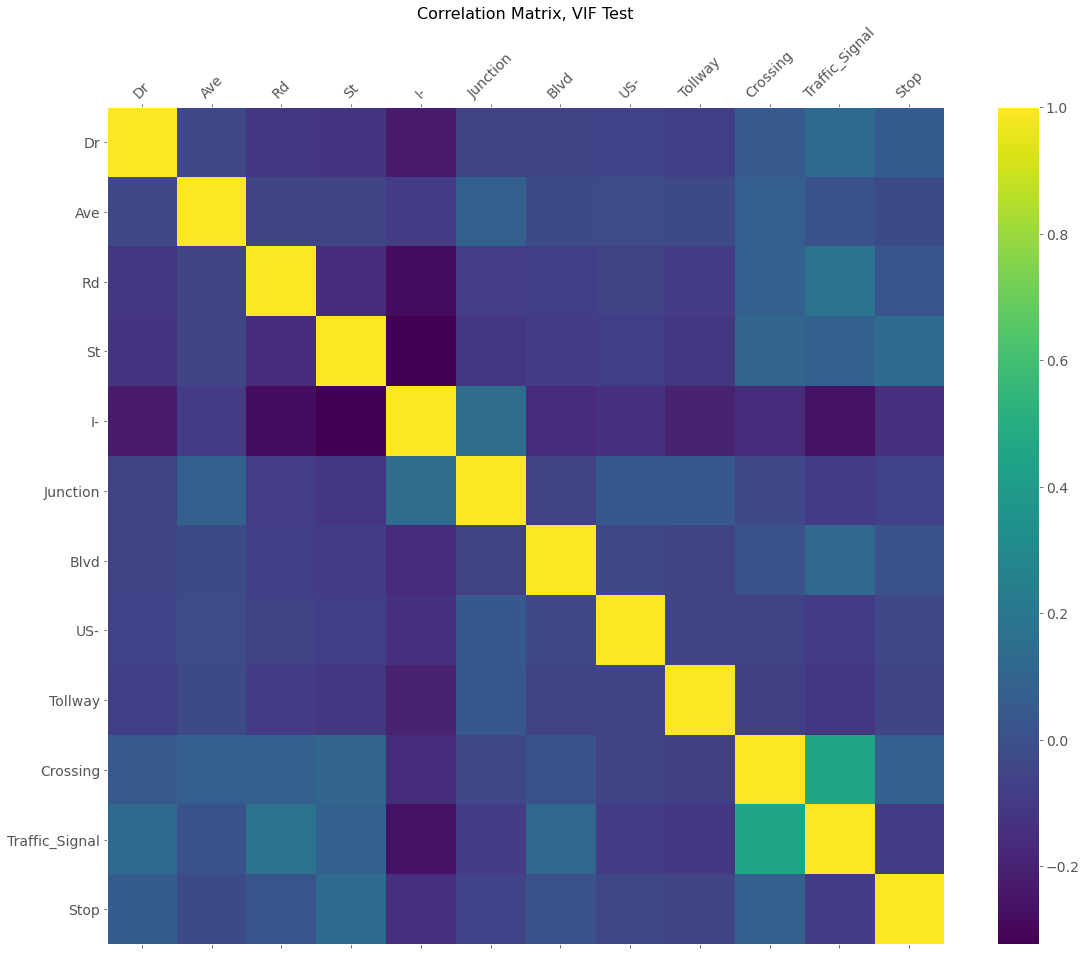

In [11]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(X.corr(), fignum=f.number)
plt.xticks(range(X.shape[1]), X.columns, fontsize=14, rotation=45)
plt.yticks(range(X.shape[1]), X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix, VIF Test', fontsize=16)

In [12]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature                                      VIF
0               Dr                                   1.0955
1              Ave                                   1.0257
2               Rd                                   1.1354
3               St                                   1.1397
4               I-                                   1.0978
5         Junction                                   1.1270
6             Blvd                                   1.0579
7              US-                                   1.0090
8          Tollway                                   1.0124
9         Crossing                                   1.4009
10  Traffic_Signal                                   1.7022
11            Stop                                   1.1050
